In [70]:
import requests 
from selenium import webdriver as wd 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
import time
import random
import re
import pandas as pd
import json # import json module
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [71]:
with open('핫식스.json') as json_file:
    json_data = json.load(json_file)

In [72]:
df = pd.DataFrame(json_data['data'])

In [73]:
df

,index,Post,Hashtags,Locates,Date,Likes
0,0,[평소 집중력을 필요로한 촬영과 음악작업을 한다고 피로가 너무 쉽게 찾아온다 이제 ...,"[핫식스, 핫식스더킹스톰, 핫식스더킹포스, 열정, 열정스타그램, 충전중, 나만의시간...",[],2020년 7월 17일,"[15,726]"
1,1,[운동전에 마시면 힘나요😳흣챠 마시구 힘ᄂ...,"[핫식스, 운동, 운동스타그램, 운동템,...",[],2020년 8월 1일,"[1,604]"
2,2,"[#AD\n촬영 끝나고 운동 하기 전 #핫식스더킹스톰 , #핫식스더킹포스 한 잔씩 ...","[AD, 핫식스더킹스톰, 핫식스더킹포스, 핫식스, 열정, 열정스타그램, 충전중, 즐...",[구리시장],2020년 8월 14일,"[7,446]"
3,3,"[#ad 핫식스 스톰 포스,스톰 상큼하고 업ᄀ...","[ad, 핫식스, 일상, 일상스타그램, 다이어...",[],2020년 8월 16일,"[1,745]"
4,4,[이번에 새로 나온 핫식스 더킹 스톰/포스 ...,"[핫식스, 일상, 일상스타그램, 다이어트템, 충전중, 핫식스더킹스톰, 핫식스더킹포스...",[],2020년 7월 18일,"[2,389]"
...,...,...,...,...,...,...
6692,6692,[],[],[],[],[]
6693,6693,[],[],[],[],[]
6694,6694,[],[],[],[],[]
6695,6695,[],[],[],[],[]


# Hashtags 분석

# 1. Word Cloud

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [75]:
tags = [element for array in list(df.Hashtags) for element in array]

In [76]:
tags[0:5]

['핫식스', '핫식스더킹스톰', '핫식스더킹포스', '열정', '열정스타그램']

In [77]:
hs_stop_words = ['error','몬스터에너지','몬스터', '에너지','monsterenergy', '에너지드링크','박카스','비타500'\
                     , '몬스터에너지울트라', '캔구루', '핫식스', '레드불', '비타500', '카페인대신비타500', '카페인대신비타500	'\
                     '건강한비타민c', 'redbull','건강한비타민c', '카페인대신비타500' ]

In [78]:
cv = CountVectorizer(max_features=10000, stop_words = hs_stop_words)

In [79]:
tdm = cv.fit_transform(tags)

In [80]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [81]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
7201,일상,995
2923,맞팔,506
4003,소통,466
2496,데일리,404
7590,좋아요,386


In [82]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [83]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

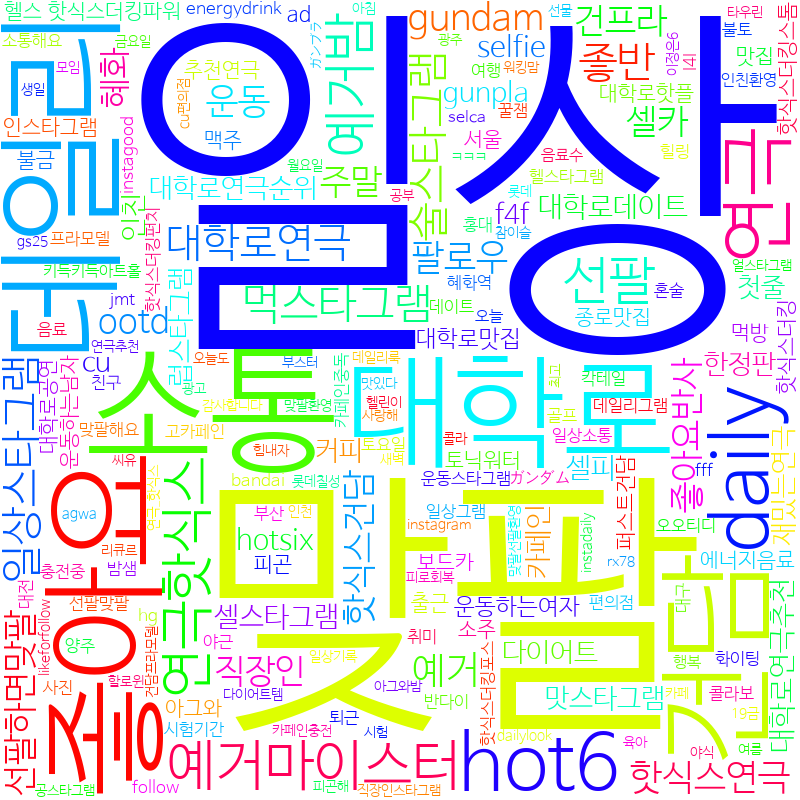

In [84]:
cloud.to_image()

# 2. Embedding

### - LSA

### - tags

In [85]:
tdm.shape

(87960, 10000)

In [86]:
# one hot encoding
import numpy as np

one_hot = np.eye(10000)

In [87]:
words = cv.get_feature_names()

In [88]:
tokens = tags

In [89]:
%%time
doc = np.zeros((1, 10000))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 1min 36s


In [90]:
from sklearn.decomposition import TruncatedSVD

In [91]:
svd = TruncatedSVD(n_components=1000)

In [92]:
svd.fit(tdm)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [93]:
svd.components_.shape

(1000, 10000)

In [94]:
word_emb = svd.components_.T

In [95]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

일상 7201
맞팔 2923
소통 4003
데일리 2496
좋아요 7590
대학로 2419
건담 1473
hot6 540
daily 348
연극 5354
예거마이스터 5775
연극핫식스 5389
예거밤 5780
선팔 3872
술스타그램 4122
먹스타그램 3001
일상스타그램 7210
좋반 7583
대학로연극 2427
예거 5770
핫식스 1204
운동 6814
gundam 482
핫식스연극 9442
팔로우 8455
선팔하면맞팔 3880
건프라 1507
셀카 3960
주말 7615
핫식스건담 9424
좋아요반사 7593
ootd 720
혜화 9634
직장인 7748
대학로데이트 2422
selfie 818
대학로연극추천 2429
셀스타그램 3959
카페인 8115
hotsix 549
셀피 3971
다이어트 2273
한정판 9373
cu 326
맛스타그램 2888
인친 7173
커피 8176
대학로연극순위 2428
gunpla 496
첫줄 7888
재밌는연극 7383
f4f 398
럽스타그램 2711
운동하는여자 6839
대학로맛집 2424
핫식스더킹파워 9433
아그와 4541
맥주 2967
핫식스더킹스톰 9432
대학로공연 2421
추천연극 7990
맛집 2906
소주 3997
대학로핫플 2433
토닉워터 8357
불금 3540
종로맛집 7578
보드카 3413
피곤 9019
운동하는남자 6836
먹방 2992
출근 8008
헬스 9601
인스타그램 7149
에너지음료 4990
서울 3835
핫식스더킹 9430
퍼스트건담 8490
ad 209
energydrink 390
취미 8039
화이팅 9772
프라모델 8882
데이트 2488
여행 5307
선팔맞팔 3874
콜라보 8236
운동스타그램 6826
편의점 8536
핫식스더킹포스 9435
일상그램 7203
헬스타그램 9606
혜화역 9645
양주 4792
부산 3474
bandai 240
소통해요 4009
대구 2357
l4l 625
밤샘 3278


In [96]:
word_emb = svd.components_.T

In [97]:
from adjustText import adjust_text
from matplotlib import pyplot
from matplotlib import font_manager, rc

In [98]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 2min 33s


79

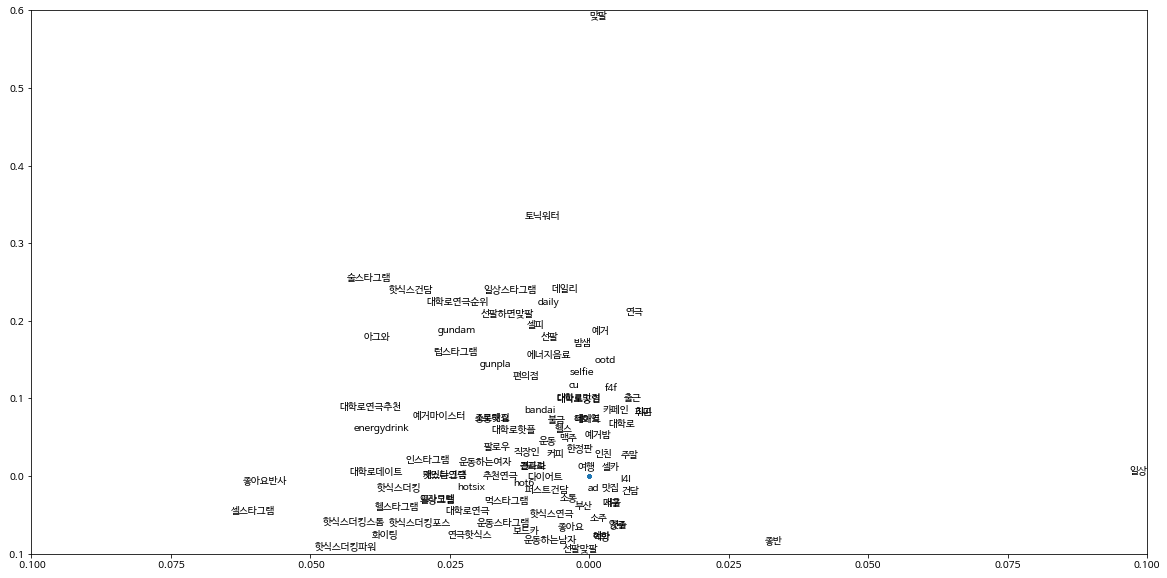

In [99]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

pyplot.xlim(-0.1, 0.1)
pyplot.ylim(-0.1, 0.6)

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - T-SNE

In [100]:
from sklearn.manifold import TSNE

In [101]:
tsne = TSNE()

In [102]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 20min 29s


6

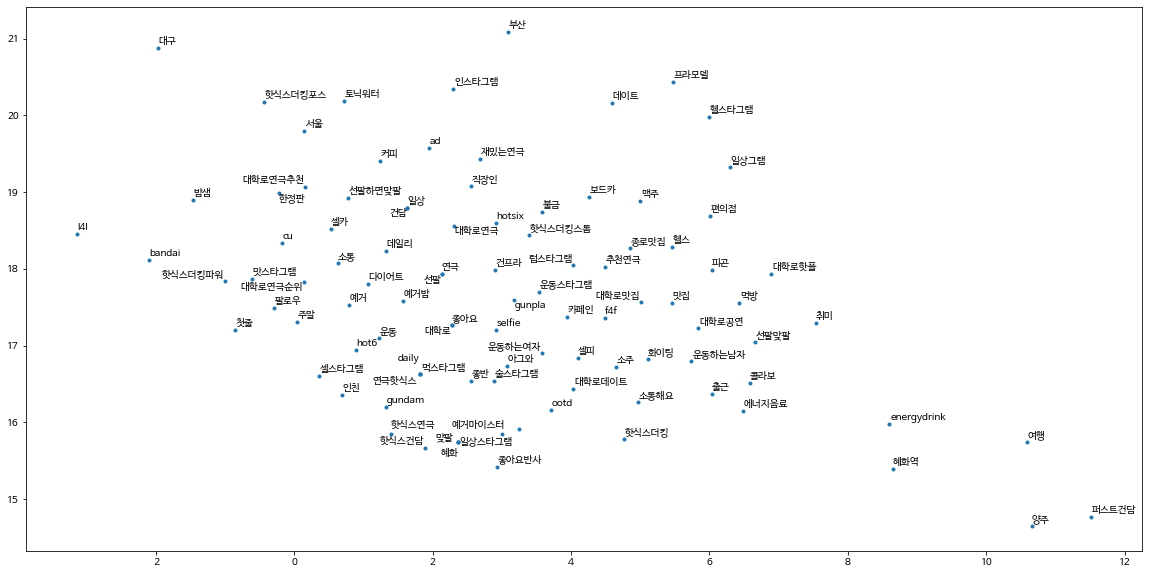

In [103]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - Word2Vec

In [104]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA

In [105]:
sentences = list(df['Hashtags'])

In [111]:
model = Word2Vec(sentences, size = 1000, min_count = 100, workers = 4, window = 100) # negative, sg

In [112]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [113]:
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

In [114]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 30)

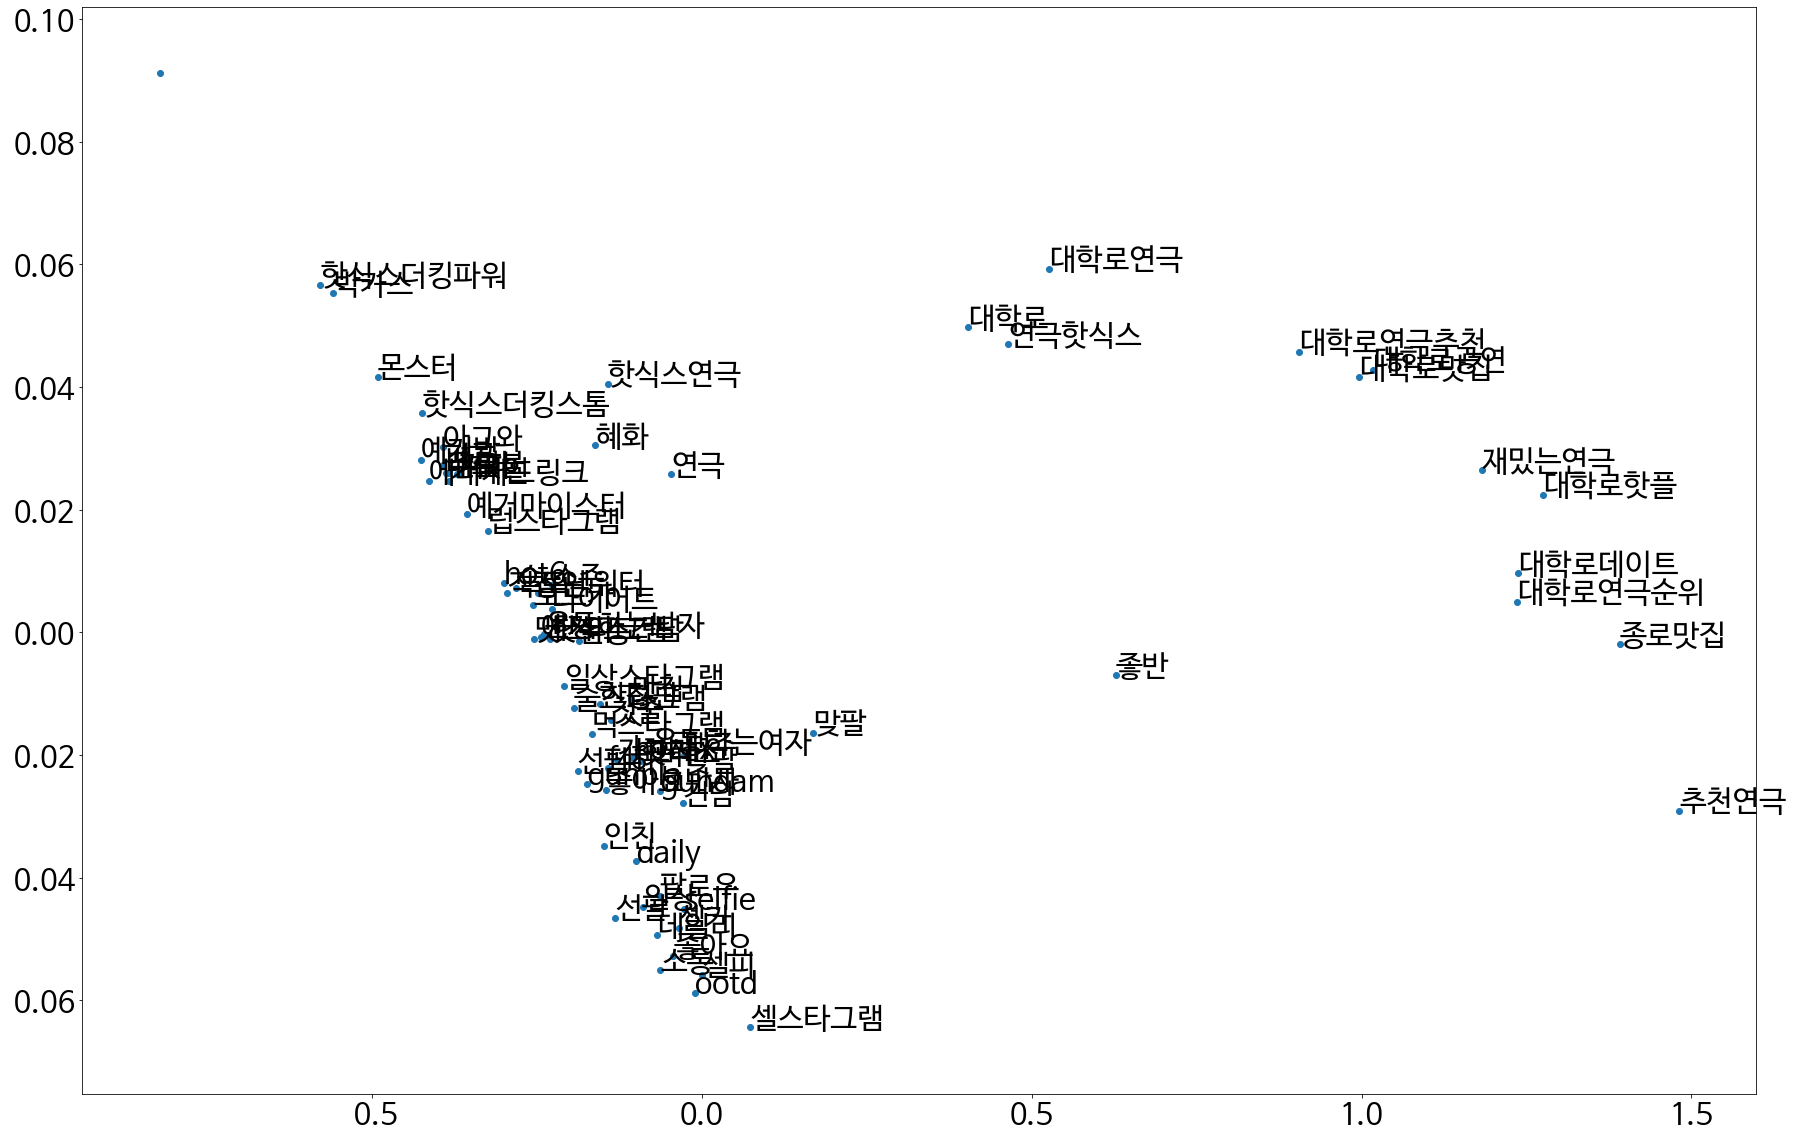

In [115]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))

# Location 분석

## - Word Cloud

In [44]:
locates = [element for array in list(df.Locates) for element in array]

In [45]:
monster_lc_stop_words = ['error','','south','korea']
cv = CountVectorizer(max_features=10000, stop_words = monster_lc_stop_words)
tdm = cv.fit_transform(locates)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [46]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
259,seoul,128
536,대학로,97
1359,혜화,88
1256,키득키득아트홀,39
965,어딘가,33


In [47]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [48]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

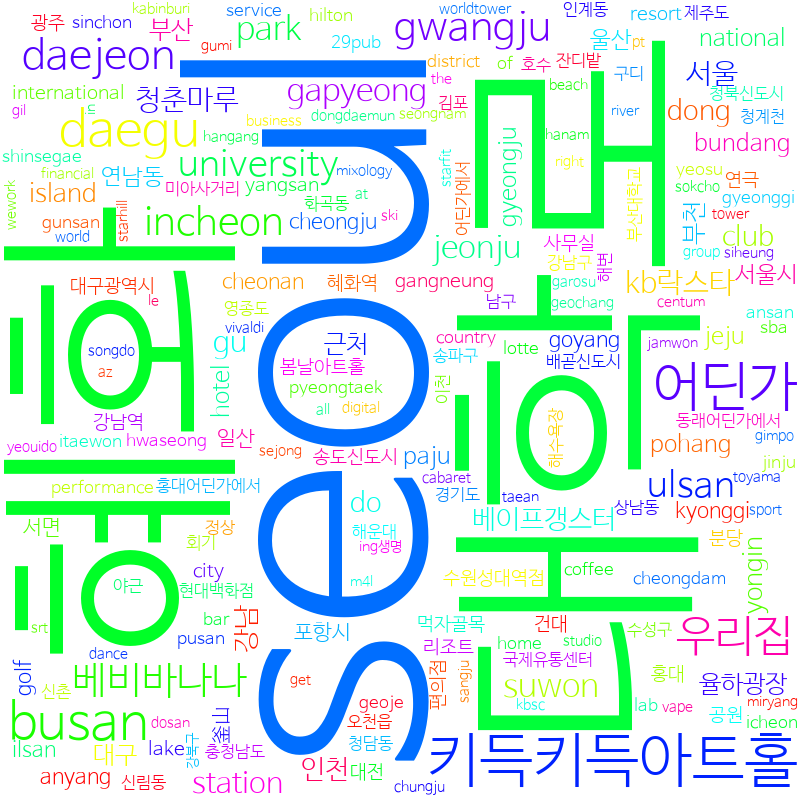

In [49]:
cloud.to_image()

## - Embedding

- LSA

In [50]:
tdm.shape

(1573, 1398)

In [51]:
# one hot encoding
import numpy as np

one_hot = np.eye(tdm.shape[1])

In [52]:
words = cv.get_feature_names()
tokens = locates

In [53]:
%%time
doc = np.zeros((1, tdm.shape[1]))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 64.9 ms


In [54]:
%%time
svd = TruncatedSVD(n_components=1000)
svd.fit(tdm)

Wall time: 1.95 s


TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [55]:
svd.components_.shape

(1000, 1398)

In [56]:
word_emb = svd.components_.T

In [57]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

seoul 259
대학로 536
혜화 1359
키득키득아트홀 1256
어딘가 965
busan 44
daegu 86
우리집 1033
daejeon 87
베비바나나 692
gwangju 131
incheon 161
university 308
ulsan 305
suwon 288
park 231
gapyeong 110
jeonju 172
gu 126
청춘마루 1209
kb락스타 180
서울 804
station 282
인천 1096
강남 349
club 74
do 94
베이프갱스터 693
dong 96
부천 726
island 166
yongin 330
근처 448
부산 715
대구 518
율하광장 1065
hotel 150
jeju 171
울산 1040
서울시 814
pohang 234
bundang 42
gyeongju 135
paju 228
연남동 986
national 221
ilsan 159
cheongju 61
釜山 337
포항시 1296
anyang 15
cheonan 58
서면 799
golf 118
일산 1100
goyang 120
kyonggi 185
광주 415
봄날아트홀 709
연극 985
먹자골목 635
공원 407
홍대 1365
대구광역시 519
강남역 354
리조트 598
city 73
resort 241
분당 739
건대 377
송도신도시 849
gangneung 109
편의점 1288
lake 188
yangsan 324
대전 530
사무실 762
수원성대역점 864
international 165
혜화역 1360
sinchon 265
pusan 236
강남구 351
jinju 173
pyeongtaek 237
청계천 1197
송파구 852
lotte 195
shinsegae 261
service 260
geoje 113
야근 954
gunsan 129
청담동 1199
청북신도시 1205
부산대학교 716
yeosu 328
hilton 145
of 226
lab 186


In [58]:
word_emb = svd.components_.T

In [59]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 34.1 s


13

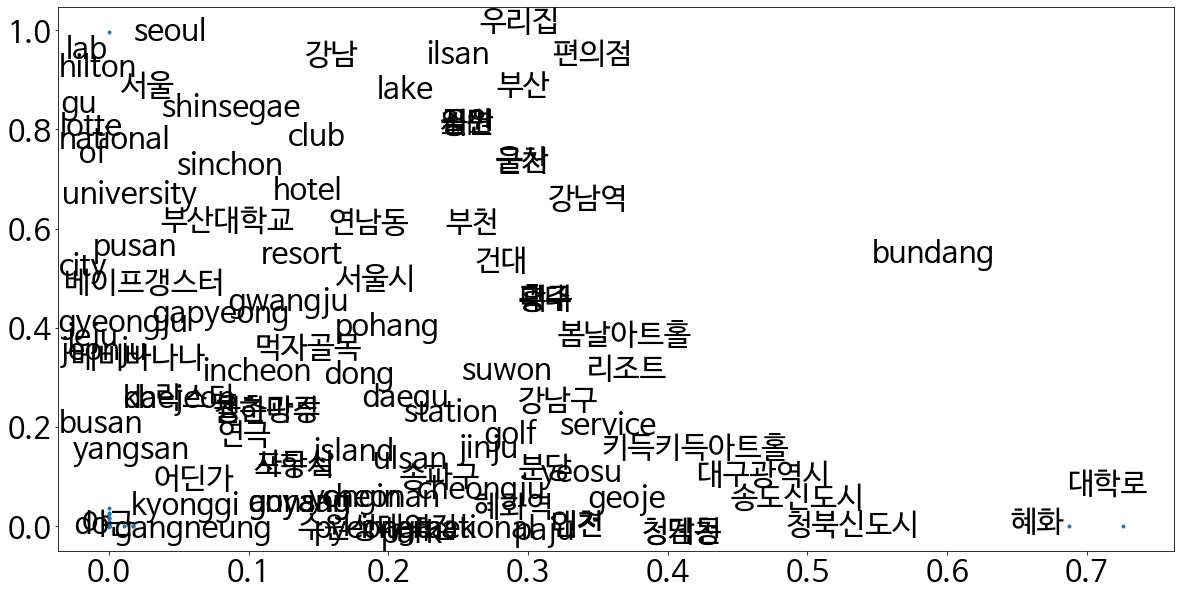

In [60]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

- T-SNE

In [61]:
tsne = TSNE()

In [62]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 24.9 s


95

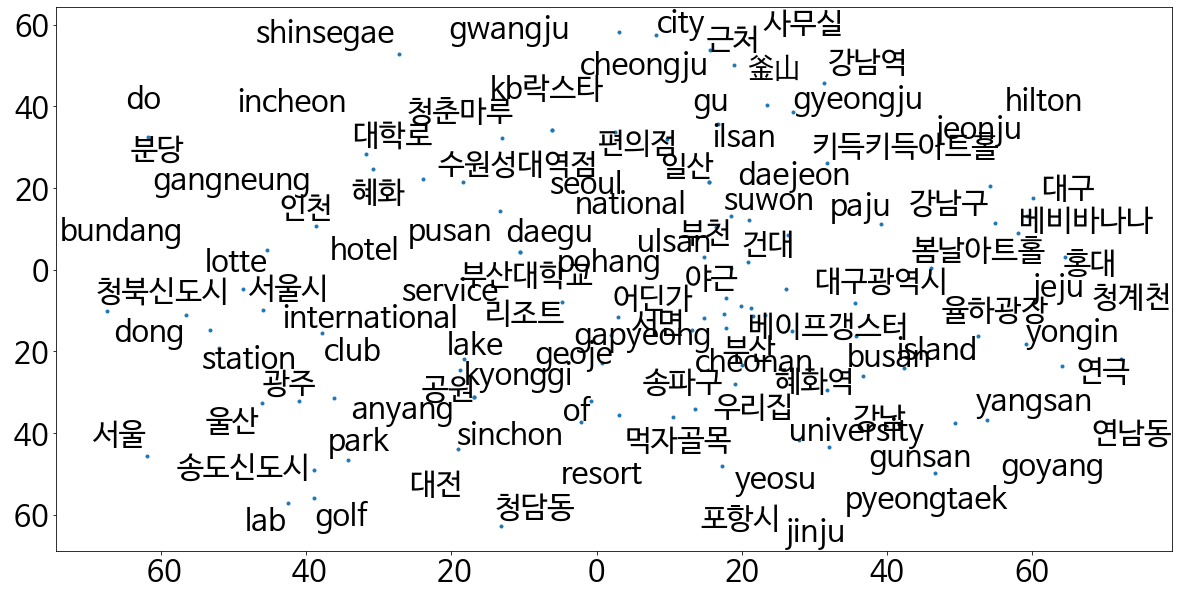

In [63]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

- Word2Vec

In [64]:
sentences = list(df['Locates'])

In [65]:
model = Word2Vec(sentences, size = 1000, min_count = 20, workers = 4, window = 100)

In [66]:
%%time

word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

Wall time: 0 ns


In [67]:
%%time
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

Wall time: 1.96 ms


In [68]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 30)

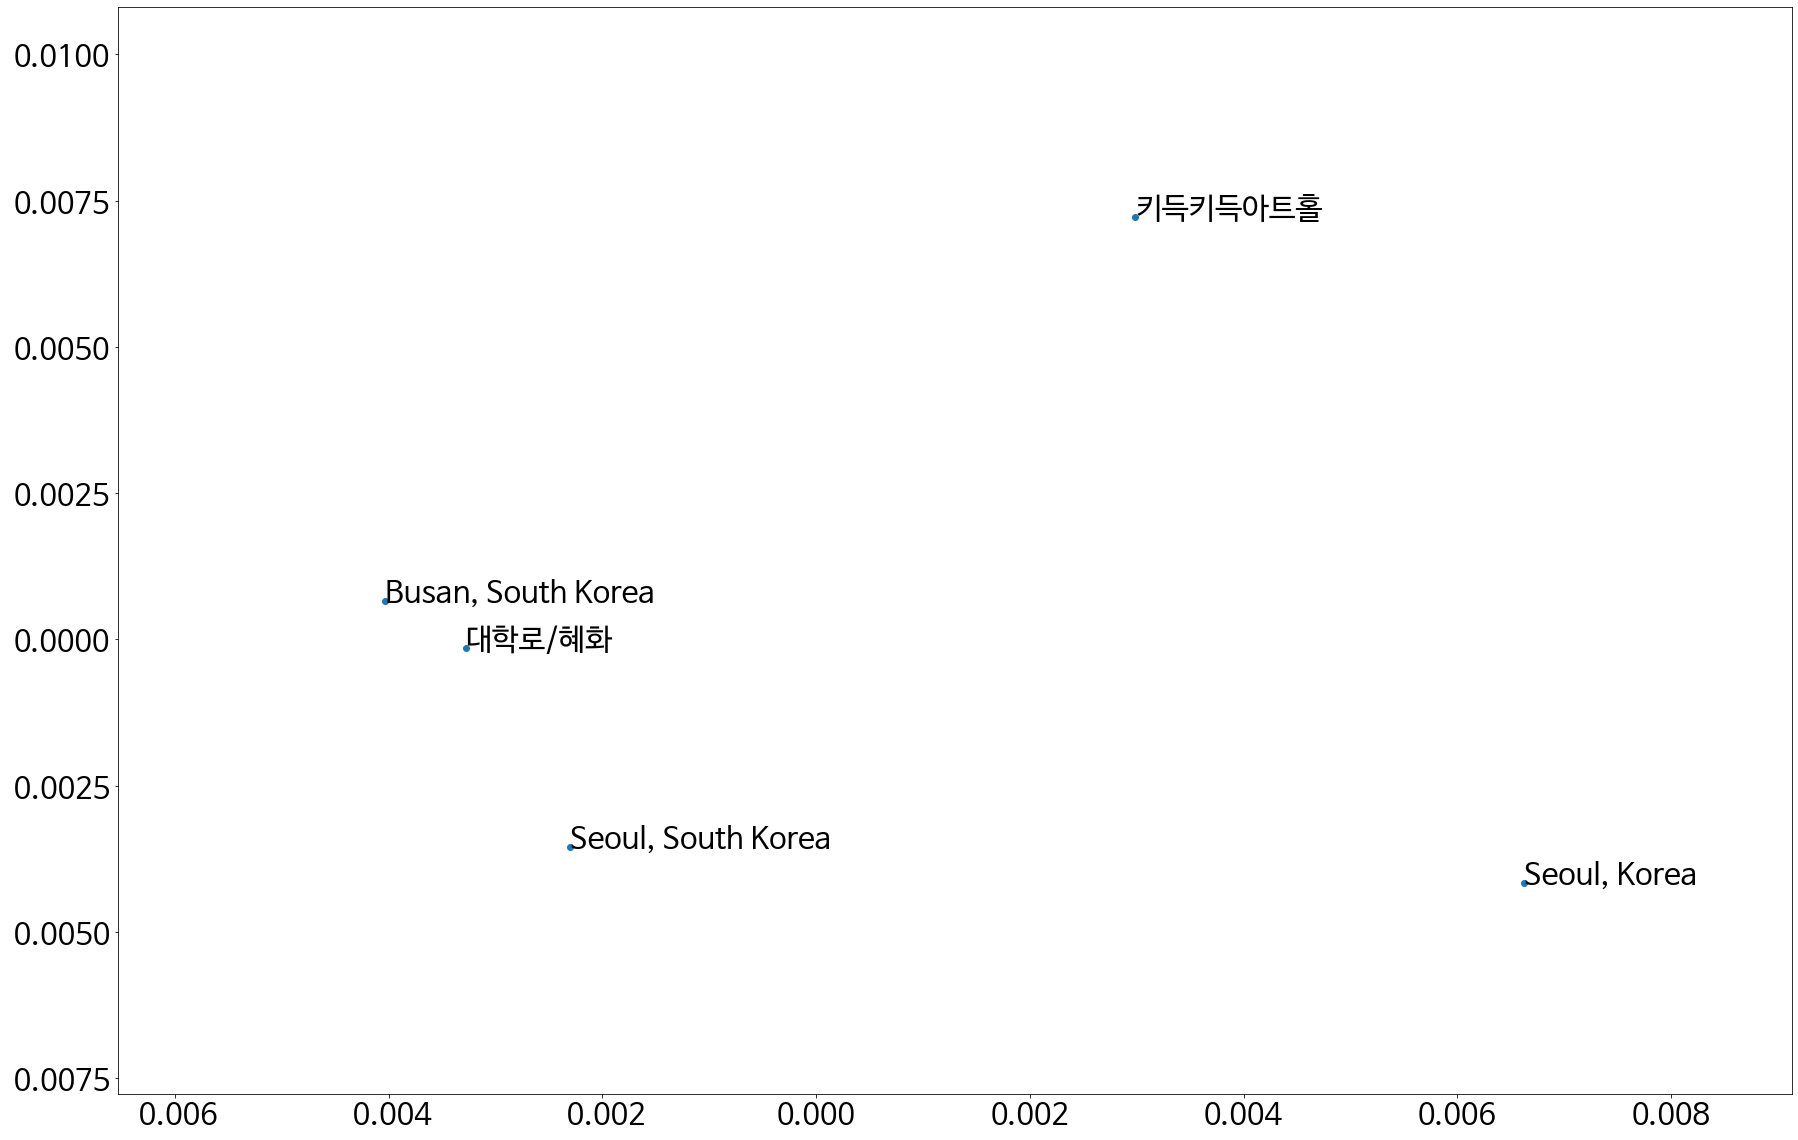

In [69]:
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))